In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from tabulate import _table_formats, tabulate

In [2]:
datas = '/Users/pkrok/OneDrive/Python/Giannakopoulos/MyData.xlsx'

In [3]:
pd.set_option("display.max_columns", None)
df=pd.read_excel(datas)
df.head(2)
#df = df.dropna()

,type,cell,aperture,aperture2,ExpansionRatio,M-N,Μ-N_lff,Μ-N_kFF,ionicRad,MetalCharge,apertureAtom_charge,apertureAtom_σ,apertureAtom_e,linker_length1,linker_length2,linker_length3,linker_mass1,linker_mass2,linker_mass3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,func1_charge,func2_charge,func3_charge,gas,mass,Dbulk,ascentricF,size - van der Waals (Å),size - kinetic diameter (Å),diffusivity,solubility,permeability,Unnamed: 37,Unnamed: 38,Unnamed: 39,aperture2.1,Dresults,number of modifications
0,CdIF-1,1.8077,3.92,3.93,1.002551,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,He,4.002,0.000121,-0.390,2.66,2.60,6.000000e-08,NaN,NaN,NaN,NaN,NaN,637.0,554.0,72.0
1,CdIF-1,1.8077,3.92,NaN,0.000000,2.18,2.257,45354.6,92,1.1901,NaN,0.25,0.0627,4.438,4.438,4.438,81.0,81.0,81.0,3.78,3.78,3.78,15.0,15.0,15.0,-0.1001,-0.1001,-0.1001,H2,2.010,0.000108,-0.217,3.13,2.89,1.700000e-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Keep only the columns I need

In [4]:
df=df[['type', 'aperture', 'aperture2', 'ionicRad', 'linker_length1', 'linker_length2', 'linker_length3', 'func1_length', 'func2_length', 'func3_length', 'func1_mass', 'func2_mass', 'func3_mass', 'apertureAtom_σ', 'apertureAtom_e', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'size - van der Waals (Å)', 'size - kinetic diameter (Å)', 'mass', 'ascentricF'  ]]
df = df.dropna()
df

,type,aperture,aperture2,ionicRad,linker_length1,linker_length2,linker_length3,func1_length,func2_length,func3_length,func1_mass,func2_mass,func3_mass,apertureAtom_σ,apertureAtom_e,linker_mass1,linker_mass2,linker_mass3,size - van der Waals (Å),size - kinetic diameter (Å),mass,ascentricF
0,CdIF-1,3.92,3.93000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,2.66,2.6,4.002,-0.390
3,CdIF-1,3.92,3.97000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.24,3.3,44.010,0.225
5,CdIF-1,3.92,4.08000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.25,3.8,16.040,0.011
6,CdIF-1,3.92,4.11000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.59,3.9,28.050,0.087
7,CdIF-1,3.92,4.11000,92,4.438,4.438,4.438,3.78,3.78,3.78,15.0,15.0,15.0,0.25,0.0627,81.000,81.000,81.000,3.72,4.0,30.070,0.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,dIm_Mg,2.95,3.06987,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.25,3.8,16.040,0.011
847,dIm_Mg,2.95,3.07875,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.59,3.9,28.050,0.087
848,dIm_Mg,2.95,3.08837,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,3.72,4.0,30.070,0.099
849,dIm_Mg,2.95,3.12791,71,6.410,6.410,6.410,3.78,3.78,3.78,15.0,15.0,15.0,0.34,1.2552,134.906,134.906,134.906,4.03,4.5,42.080,0.142


# Bring my data into shape

In [5]:
# df2=df.drop_duplicates(subset=['type'], keep='first')
# df2

In [6]:
df=df.rename(columns={'linker_length3':'linker3', 'func3_length':'func3G', 'linker_length2':'linker2', 'func2_length':'func2G', 'linker_length1':'linker1', 'func1_length':'func1G', 'apertureAtom_σ':'σ', 'apertureAtom_e':'e', 'linker_mass1.1':'linker_mass2', 'size - van der Waals (Å)':'vdW', 'size - kinetic diameter (Å)':'kinDiam' })

# I sort my data

In [7]:
df=df.sort_values(by = ['linker1', 'func1G', 'ionicRad'], ascending = True)
#df3.reset_index(drop=True)
df.head()

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
265,tetr-ZIF8_Be,3.39,3.400,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.60,4.002,-0.390
266,tetr-ZIF8_Be,3.39,3.410,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,2.89,2.010,-0.217
267,tetr-ZIF8_Be,3.39,3.430,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.94,3.46,31.999,0.022
268,tetr-ZIF8_Be,3.39,3.390,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.24,3.30,44.010,0.225
269,tetr-ZIF8_Be,3.39,3.433,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,3.64,28.000,0.037


In [8]:
df=df.reset_index(drop=True)
df.head()

,type,aperture,aperture2,ionicRad,linker1,linker2,linker3,func1G,func2G,func3G,func1_mass,func2_mass,func3_mass,σ,e,linker_mass1,linker_mass2,linker_mass3,vdW,kinDiam,mass,ascentricF
0,tetr-ZIF8_Be,3.39,3.400,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.66,2.60,4.002,-0.390
1,tetr-ZIF8_Be,3.39,3.410,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,2.89,2.010,-0.217
2,tetr-ZIF8_Be,3.39,3.430,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,2.94,3.46,31.999,0.022
3,tetr-ZIF8_Be,3.39,3.390,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.24,3.30,44.010,0.225
4,tetr-ZIF8_Be,3.39,3.433,41,3.66,3.66,3.66,3.78,3.78,3.78,15.0,15.0,15.0,0.325,0.7112,83.0,83.0,83.0,3.13,3.64,28.000,0.037


# Multiple Regression Model

## split with random.rand

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [10]:
df.columns

Index(['type', 'aperture', 'aperture2', 'ionicRad', 'linker1', 'linker2',
       'linker3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass',
       'func3_mass', 'σ', 'e', 'linker_mass1', 'linker_mass2', 'linker_mass3',
       'vdW', 'kinDiam', 'mass', 'ascentricF'],
      dtype='object')

In [11]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(train[['aperture2']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 4.01326892e-04  8.69167743e-01 -5.83747396e-04 -5.83747396e-04
   4.69031258e-04 -7.59199849e-03 -7.59199849e-03  1.67340808e-02
  -3.95306817e-02 -3.77617397e-02 -6.25131138e-02 -8.36037691e-03
   8.12776394e-03  4.19225508e-04  1.11011041e+00 -2.61875936e-01
   1.95217245e-01  1.82757397e-01 -3.18216287e-03  1.61429600e-01]]


In [12]:
y_hat= regr.predict(test[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
x = np.asanyarray(test[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(test[['aperture2']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print('Explained variance: %.2f' % explained_variance_score(y, y_hat))

Residual sum of squares: 0.02
Variance score: 0.87
Explained variance: 0.87


In [13]:
print(regr.coef_)

[[ 4.01326892e-04  8.69167743e-01 -5.83747396e-04 -5.83747396e-04
   4.69031258e-04 -7.59199849e-03 -7.59199849e-03  1.67340808e-02
  -3.95306817e-02 -3.77617397e-02 -6.25131138e-02 -8.36037691e-03
   8.12776394e-03  4.19225508e-04  1.11011041e+00 -2.61875936e-01
   1.95217245e-01  1.82757397e-01 -3.18216287e-03  1.61429600e-01]]


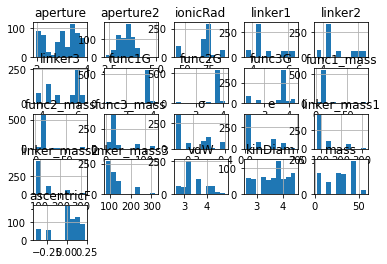

In [14]:
df.hist()
plt.show()

## split with train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=None)

In [17]:
regr.fit (x_train, y_train)
print('Coefficients: ', regr.coef_)

Coefficients:  [[ 2.53130011e-03  8.35415754e-01 -1.59249735e-02 -1.59249735e-02
  -1.46311013e-02 -9.62807037e-03 -9.62807037e-03  2.02688475e-02
  -5.24204571e-02 -5.24204571e-02  3.04040122e-02  5.41410132e-04
   5.41410132e-04 -1.83301675e-03 -1.16195104e-01 -9.43279111e-02
   7.34961435e-02  2.35635996e-01 -2.73051899e-03 -5.82218110e-03]]


In [18]:
y_hat=regr.predict(x_test)

print("Residual sum of squares: %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.02
Variance score: 0.85


# With repeated splits

In [19]:
x = np.asanyarray(df[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
y = np.asanyarray(df[['aperture2']])

## K-fold Cross-Validation

In [20]:
from sklearn.model_selection import KFold

## Linear Regressor with K-fold Cross-Validation

In [21]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=0)
from sklearn import metrics

In [36]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf', 'testMSE', 'trainMSE', 'testMaxEr', 'trainMaxEr', 'testMedABSErr', 'trainMedABSErr'])

tree=DecisionTreeRegressor(random_state=0, max_depth=6)
regr = linear_model.LinearRegression()

kfold = KFold(n_splits=90, shuffle=True, random_state = None)

#make the test set
testdf=df.iloc[526:, 0:]
testx = np.asanyarray(testdf[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
testy = np.asanyarray(testdf[['aperture2']])   

i=0

for i in range(100, 525, 5):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()
    dataTrueTest = list()
    
    df2=df.iloc[:i, :]
    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        
        # fit model
        regr.fit(train_X, train_y)
       
        # make predictions
        pred_train = regr.predict(train_X)
                
        #store
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        pred_test = regr.predict(testx)
        data_predTest.extend(pred_test)
        dataTrueTest.extend(testy)
        
    # evaluate
    R2_test = (metrics.r2_score(dataTrueTest,data_predTest))
    R2_train = (metrics.r2_score(data_y2,data_predTrain))
    MSE_test = (metrics.mean_squared_error(dataTrueTest,data_predTest))
    MSE_train = (metrics.mean_squared_error(data_y2,data_predTrain))
    MaxEr_test = metrics.max_error(dataTrueTest,data_predTest)
    MaxEr_train = metrics.max_error(data_y2,data_predTrain)
    MedABSErr_test = metrics.median_absolute_error(dataTrueTest,data_predTest)
    MedABSErr_train = metrics.median_absolute_error(data_y2,data_predTrain)
    
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'testMSE'] = MSE_test
    dfMetrics.loc[i, 'trainMSE'] = MSE_train
    dfMetrics.loc[i, 'testMaxEr'] = MaxEr_test
    dfMetrics.loc[i, 'trainMaxEr'] = MaxEr_train
    dfMetrics.loc[i, 'testMedABSErr'] = MedABSErr_test
    dfMetrics.loc[i, 'trainMedABSErr'] = MedABSErr_train
    dfMetrics.loc[i, 'data'] = i

In [37]:
len(dataTrueTest)

9990

In [38]:
len(data_predTest)

9990

In [39]:
# dfMetrics.tail(20)

<function matplotlib.pyplot.show(close=None, block=None)>

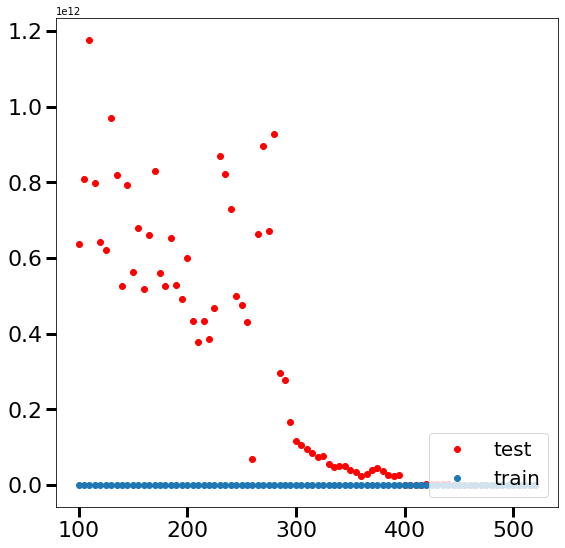

In [40]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMedABSErr']
AxY2=dfMetrics['trainMedABSErr']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

#plt.ylim(-1, 2)
#plt.xlim(1, 700)
#plt.xscale('log')
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

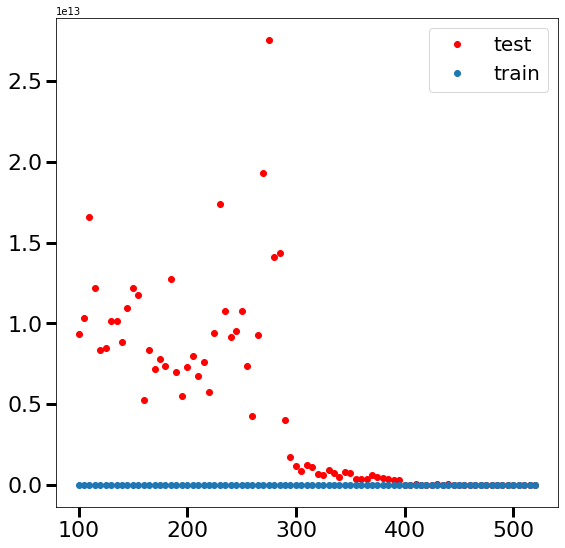

In [30]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMaxEr']
AxY2=dfMetrics['trainMaxEr']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

#plt.ylim(0, 0.5)
#plt.xlim(0, 600)
#plt.xscale('log')
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='upper right', fontsize=20)

plt.show

## Decision Tree Regressor with K-fold Cross-Validation

In [34]:
dfMetrics = pd.DataFrame(columns = ['data', 'testPerf', 'trainPerf', 'testMSE', 'trainMSE', 'testMaxEr', 'trainMaxEr', 'testMedABSErr', 'trainMedABSErr'])

tree=DecisionTreeRegressor(random_state=0, max_depth=6)
regr = linear_model.LinearRegression()

# kfold = KFold(n_splits=10, shuffle=True, random_state = None)

#make the test set
testdf=df.iloc[526:, 0:]
testx = np.asanyarray(testdf[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
testy = np.asanyarray(testdf[['aperture2']])   

i=0

kfold = KFold(n_splits=90, shuffle=True, random_state = None)

for i in range(100, 525, 5):
    data_y1 = list()
    data_y2 = list()
    data_predTrain = list()
    data_predTest = list()
    dataTrueTest = list()
    
    df2=df.iloc[:i, :]
    x = np.asanyarray(df2[['ionicRad', 'aperture', 'linker1', 'linker2', 'linker3', 'linker_mass1', 'linker_mass2', 'linker_mass3', 'func1G', 'func2G', 'func3G', 'func1_mass', 'func2_mass', 'func3_mass', 'σ', 'e', 'vdW', 'kinDiam', 'mass', 'ascentricF']])
    y = np.asanyarray(df2[['aperture2']])

    # enumerate splits
    for train_ix, test_ix in kfold.split(x):
        # get data
        train_X, test_X = x[train_ix], x[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        
        # fit model
        tree.fit(train_X, train_y)
       
        # make predictions
        pred_train = tree.predict(train_X)
                
        #store
        data_y2.extend(train_y)
        data_predTrain.extend(pred_train)
        pred_test = tree.predict(testx)
        data_predTest.extend(pred_test)
        dataTrueTest.extend(testy)
        
    # evaluate
    R2_test = (metrics.r2_score(dataTrueTest,data_predTest))
    R2_train = (metrics.r2_score(data_y2,data_predTrain))
    MSE_test = (metrics.mean_squared_error(dataTrueTest,data_predTest))
    MSE_train = (metrics.mean_squared_error(data_y2,data_predTrain))
    MaxEr_test = metrics.max_error(dataTrueTest,data_predTest)
    MaxEr_train = metrics.max_error(data_y2,data_predTrain)
    MedABSErr_test = metrics.median_absolute_error(dataTrueTest,data_predTest)
    MedABSErr_train = metrics.median_absolute_error(data_y2,data_predTrain)

    
    dfMetrics.loc[i, 'testPerf'] = R2_test
    dfMetrics.loc[i, 'trainPerf'] = R2_train
    dfMetrics.loc[i, 'testMSE'] = MSE_test
    dfMetrics.loc[i, 'trainMSE'] = MSE_train
    dfMetrics.loc[i, 'testMaxEr'] = MaxEr_test
    dfMetrics.loc[i, 'trainMaxEr'] = MaxEr_train
    dfMetrics.loc[i, 'testMedABSErr'] = MedABSErr_test
    dfMetrics.loc[i, 'trainMedABSErr'] = MedABSErr_train
    dfMetrics.loc[i, 'data'] = i

<function matplotlib.pyplot.show(close=None, block=None)>

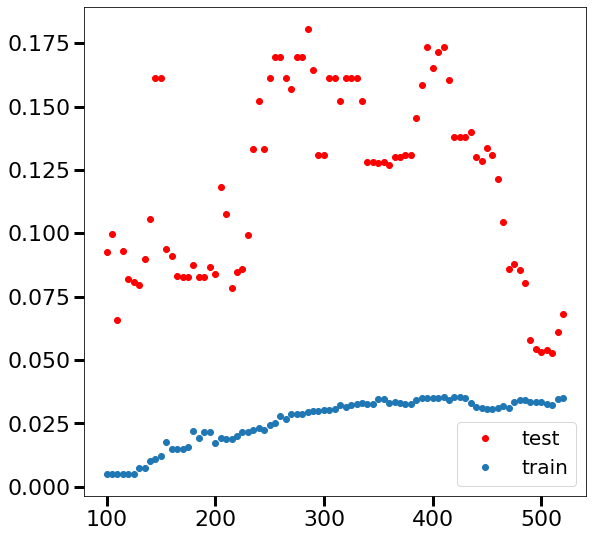

In [35]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMedABSErr']
AxY2=dfMetrics['trainMedABSErr']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

#plt.ylim(-1, 2)
#plt.xlim(1, 700)
#plt.xscale('log')
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

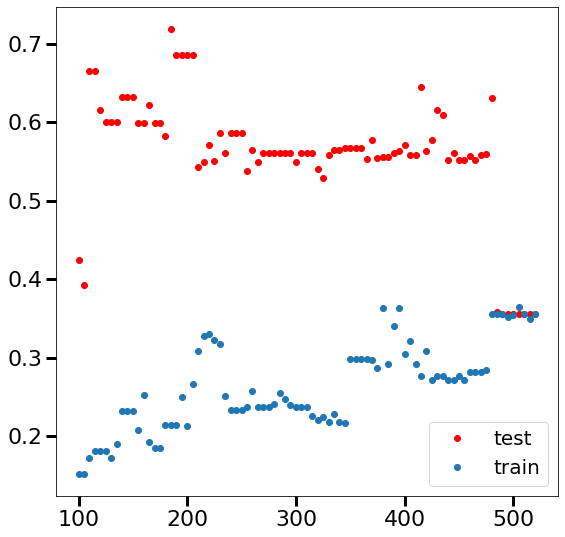

In [33]:
AxX=dfMetrics['data']
AxY=dfMetrics['testMaxEr']
AxY2=dfMetrics['trainMaxEr']
plt.plot(AxX, AxY, 'ro', label='test')
plt.plot(AxX, AxY2, 'o', label='train')

#plt.ylim(-1, 2)
#plt.xlim(1, 700)
#plt.xscale('log')
plt.tick_params(which='both', width=3)
plt.tick_params(which='major', length=10)
plt.tick_params(which='minor', length=4, color='r')
plt.rcParams["figure.figsize"] = (9,9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)

plt.show